In [1]:
# importing the dependencies
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
for dirname, _, filenames in os.walk('..\Datasets\Digit Recognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Datasets\Digit Recognizer\sample_submission.csv
..\Datasets\Digit Recognizer\test.csv
..\Datasets\Digit Recognizer\test.csv.zip
..\Datasets\Digit Recognizer\train.csv
..\Datasets\Digit Recognizer\train.csv.zip


In [3]:
# loading the dataset
train_df = pd.read_csv("../Datasets/Digit Recognizer/train.csv")
test_df = pd.read_csv("../Datasets/Digit Recognizer/test.csv")
train = pd.read_csv("../Datasets/Digit Recognizer/train.csv") 
test = pd.read_csv("../Datasets/Digit Recognizer/test.csv")

In [4]:
y_train = train_df['label']
del train_df['label']

In [5]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_bin = label_binarizer.fit_transform(y_train)

In [6]:
X_train = train_df.values
X_test = test_df.values

In [7]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_all = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32')
X_test_all = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_bin, test_size=0.20, random_state=42, shuffle=True)

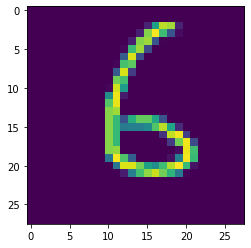

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [10]:
index = 123
plt.imshow(X_train[index])
plt.show()
y_train[index]

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.001)

In [14]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 10 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

In [15]:
history = model.fit(X_train,y_train, batch_size = 128 ,epochs = 20 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction])

Epoch 1/20
263/263 [==============================] - 128s 482ms/step - loss: 0.1972 - accuracy: 0.9390 - val_loss: 2.5202 - val_accuracy: 0.1294 - lr: 0.0010
Epoch 2/20
263/263 [==============================] - 115s 439ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.1281 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 3/20
263/263 [==============================] - 95s 362ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0534 - val_accuracy: 0.9831 - lr: 0.0010
Epoch 4/20
263/263 [==============================] - 142s 541ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0411 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 5/20
263/263 [==============================] - 121s 459ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.0327 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 6/20
263/263 [==============================] - 119s 451ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0392 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 7/20
263/263 [===========================

In [16]:
model.save('cnn_3l_bn_20.h5')

In [17]:
def create_submission(predictions,keys,path):
    result = pd.DataFrame(
        predictions,
        columns=['Label'],
        index=keys
        )
    result.index.name='ImageId'
    result.to_csv(path, index=True)

In [18]:
predictions_prob=model.predict(X_test_all) # get predictions for all the test data

875/875 [==============================] - 23s 26ms/step


In [19]:
labels=[np.argmax(pred) for pred in predictions_prob]

In [20]:
keys=[i for i in range(1,28001) ]

In [22]:
create_submission(predictions=labels,keys=keys,path='submission_cnn_3l_bn_20.csv')

Prediction Score on Kaggle: 0.98957